In [49]:
from __future__ import division
import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
dbpshp = pd.read_csv('/DATA/raw/dbpshp/all-gwas_ep.txt', sep='\t')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
dbpshp.head()

,chrom,chrom_pos,snpid_in_dbsnp,snpid_in_paper,pmid,pvalue,phenotype,paper_phenotype_description,paper_phenotype_categories,title,...,rsid,ref,ref_af,ref_ep,alt,alt_af,alt_ep,lo_nuc,lo_af,lo_ep
0,chr1,1140435,1815606.0,rs1815606,20686565,0.021010,Total cholesterol,Lipid level measurements,CVD risk factor (CVD RF);Lipids,"Biological, clinical and population relevance ...",...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546
1,chr1,1140435,1815606.0,rs1815606,19060906,0.019390,Triglycerides,Lipid level measurements,CVD risk factor (CVD RF);Lipids,Common variants at 30 loci contribute to polyg...,...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546
2,chr1,1140435,1815606.0,rs1815606,22685416,0.000015,Gene expression of TNFRSF18 (probeID ILMN_2349...,Gene expression in brain (cerebellum and tempo...,Quantitative trait(s);Gene expression (RNA);Neuro,Brain expression genome-wide association study...,...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546
3,chr1,1140435,1815606.0,rs1815606,20339536,0.024021,Total cholesterol change with statins,"Response to statin treatment (simvastatin, pra...",Drug response;Quantitative trait(s);CVD risk f...,Genome-wide association of lipid-lowering resp...,...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546
4,chr1,1140435,1815606.0,rs1815606,22295056,0.009550,Acute lung injury following major trauma,Acute lung injury following major trauma,Pulmonary;Wound,Genome wide association identifies PPFIA1 as a...,...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546


In [20]:
dbpshp.columns.values

array(['chrom', 'chrom_pos', 'snpid_in_dbsnp', 'snpid_in_paper', 'pmid',
       'pvalue', 'phenotype', 'paper_phenotype_description',
       'paper_phenotype_categories', 'title', 'in_gene', 'dbsnp_fx', 'A',
       'C', 'G', 'T', 'cpos_m1', 'rsid', 'ref', 'ref_af', 'ref_ep', 'alt',
       'alt_af', 'alt_ep', 'lo_nuc', 'lo_af', 'lo_ep'], dtype=object)

In [17]:
sabetti = pd.read_csv('/DATA/raw/sabetti/sabetti_snps.txt', sep='\t', header=None, names=['rsid'])

In [18]:
sabetti['rsid'].isin(dbpshp['rsid']).sum()

19

In [19]:
sabetti.shape

(83, 1)

In [23]:
dbfxn = pd.read_csv('/DATA/raw/dbpshp/snp_annot.txt', sep='\t', header=None, names=['c','chrom_pos','rsid','gene_list','fx'])

In [25]:
caps = pd.read_csv('/DATA/raw/1KG/CAPs/LBS_lowEP_highAF_snps_3_29_16.csv', sep='\t')

In [27]:
dbpshp

,chrom,chrom_pos,snpid_in_dbsnp,snpid_in_paper,pmid,pvalue,phenotype,paper_phenotype_description,paper_phenotype_categories,title,...,rsid,ref,ref_af,ref_ep,alt,alt_af,alt_ep,lo_nuc,lo_af,lo_ep
0,chr1,1140435,1815606.0,rs1815606,20686565,2.101000e-02,Total cholesterol,Lipid level measurements,CVD risk factor (CVD RF);Lipids,"Biological, clinical and population relevance ...",...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546
1,chr1,1140435,1815606.0,rs1815606,19060906,1.939000e-02,Triglycerides,Lipid level measurements,CVD risk factor (CVD RF);Lipids,Common variants at 30 loci contribute to polyg...,...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546
2,chr1,1140435,1815606.0,rs1815606,22685416,1.530000e-05,Gene expression of TNFRSF18 (probeID ILMN_2349...,Gene expression in brain (cerebellum and tempo...,Quantitative trait(s);Gene expression (RNA);Neuro,Brain expression genome-wide association study...,...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546
3,chr1,1140435,1815606.0,rs1815606,20339536,2.402082e-02,Total cholesterol change with statins,"Response to statin treatment (simvastatin, pra...",Drug response;Quantitative trait(s);CVD risk f...,Genome-wide association of lipid-lowering resp...,...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546
4,chr1,1140435,1815606.0,rs1815606,22295056,9.550000e-03,Acute lung injury following major trauma,Acute lung injury following major trauma,Pulmonary;Wound,Genome wide association identifies PPFIA1 as a...,...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546
5,chr1,1140435,1815606.0,rs1815606,20686565,5.349000e-03,LDL cholesterol,Lipid level measurements,CVD risk factor (CVD RF);Lipids,"Biological, clinical and population relevance ...",...,rs1815606,G,0.287939,0.052546,T,0.712061,0.664072,G,0.287939,0.052546
6,chr1,1210471,11260577.0,rs11260577,23562823,4.060000e-02,Diabetic retinopathy in Type 2 diabetes mellitus,Retinopathy (diabetic retinopathy),Eye-related;Type 2 diabetes (T2D),Genome-wide association study in a Chinese pop...,...,rs11260577,T,0.517372,0.033101,C,0.482628,0.918407,T,0.517372,0.033101
7,chr1,1211292,6685064.0,rs6685064,23562823,4.000000e-02,Diabetic retinopathy in Type 2 diabetes mellitus,Retinopathy (diabetic retinopathy),Eye-related;Type 2 diabetes (T2D),Genome-wide association study in a Chinese pop...,...,rs6685064,C,0.569489,0.103477,T,0.430511,0.689569,C,0.569489,0.103477
8,chr1,1211292,6685064.0,rs6685064,23455636,6.595500e-03,Advanced age-related macular degeneration (geo...,Age-related macular degeneration,Eye-related;Aging;Age-related macular degenera...,Seven new loci associated with age-related mac...,...,rs6685064,C,0.569489,0.103477,T,0.430511,0.689569,C,0.569489,0.103477
9,chr1,1211292,6685064.0,rs6685064,20453842,2.655960e-02,Rheumatoid arthritis,Rheumatoid arthritis,Inflammation;Arthritis;Rheumatoid arthritis,Genome-wide association study meta-analysis id...,...,rs6685064,C,0.569489,0.103477,T,0.430511,0.689569,C,0.569489,0.103477


In [28]:
capsOverlap = dbpshp.merge(caps, on=['chrom','chrom_pos'])

In [33]:
pd.unique(capsOverlap['rsid']).shape

(65,)

In [42]:
shic = pd.read_csv('/DATA/raw/dbpshp/chr18_overlap.bed', sep='\t', header=None, names=['chrom','chrom_pos','chrom_end','rsid']).merge(dbpshp, on=['chrom','chrom_pos']).drop_duplicates(subset=['rsid_y'])

(array([ 49.,  12.,   6.,   4.,   1.,   2.,   2.,   2.,   3.,   1.]),
 array([ 0.00861211,  0.05615315,  0.1036942 ,  0.15123524,  0.19877628,
         0.24631733,  0.29385837,  0.34139942,  0.38894046,  0.43648151,
         0.48402255]),
 <a list of 10 Patch objects>)

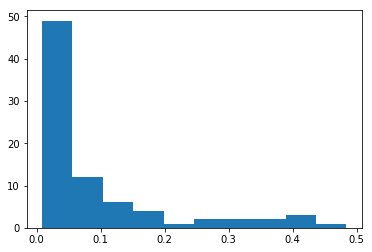

In [51]:
plt.hist(shic[pd.notnull(shic['lo_ep'])]['lo_ep'])

(array([  3.,   3.,   1.,   2.,   1.,   4.,  13.,  10.,  32.,  13.]),
 array([ 0.21425719,  0.27014776,  0.32603834,  0.38192891,  0.43781949,
         0.49371006,  0.54960064,  0.60549121,  0.66138179,  0.71727236,
         0.77316294]),
 <a list of 10 Patch objects>)

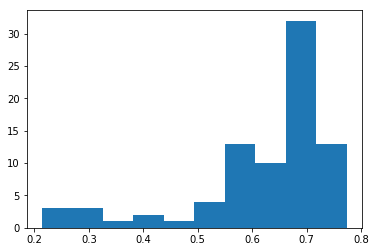

In [52]:
plt.hist(shic[pd.notnull(shic['lo_ep'])]['lo_af'])

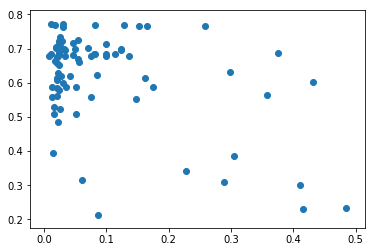

In [55]:
plt.scatter(shic[pd.notnull(shic['lo_ep'])]['lo_ep'], shic[pd.notnull(shic['lo_ep'])]['lo_af'])

In [54]:
sabetti = pd.read_csv('/DATA/raw/dbpshp/sabetti_overlap.bed', sep='\t', header=None, names=['chrom','chrom_pos','chrom_end','rsid']).merge(dbpshp, on=['chrom','chrom_pos']).drop_duplicates(subset=['rsid_y'])

(array([ 182.,   28.,   26.,   14.,    2.,    5.,    7.,   14.,    3.,    1.]),
 array([ 0.00414333,  0.04998317,  0.095823  ,  0.14166284,  0.18750268,
         0.23334252,  0.27918236,  0.3250222 ,  0.37086204,  0.41670188,
         0.46254171]),
 <a list of 10 Patch objects>)

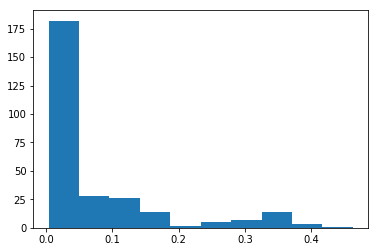

In [56]:
plt.hist(sabetti[pd.notnull(sabetti['lo_ep'])]['lo_ep'])

(array([  3.,  12.,  14.,  16.,  10.,  32.,  37.,  77.,  51.,  30.]),
 array([ 0.15754792,  0.22132588,  0.28510383,  0.34888179,  0.41265974,
         0.4764377 ,  0.54021565,  0.60399361,  0.66777157,  0.73154952,
         0.79532748]),
 <a list of 10 Patch objects>)

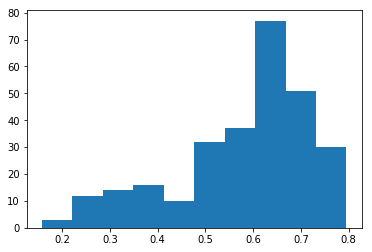

In [57]:
plt.hist(sabetti[pd.notnull(sabetti['lo_ep'])]['lo_af'])

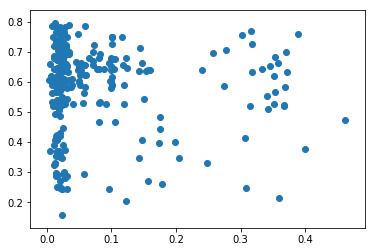

In [58]:
plt.scatter(sabetti[pd.notnull(sabetti['lo_ep'])]['lo_ep'], sabetti[pd.notnull(sabetti['lo_ep'])]['lo_af'])